# IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# DATA COLLECTION

In [4]:
data=pd.read_csv('Breast Cancer Dataset.csv')

# DATA ANALYSIS AND FEATURE ENGINEERING

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.shape

(569, 33)

In [7]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
data.count()

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
Unnamed:

In [10]:
data.mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_2264\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


id                         3.037183e+07
radius_mean                1.412729e+01
texture_mean               1.928965e+01
perimeter_mean             9.196903e+01
area_mean                  6.548891e+02
smoothness_mean            9.636028e-02
compactness_mean           1.043410e-01
concavity_mean             8.879932e-02
concave points_mean        4.891915e-02
symmetry_mean              1.811619e-01
fractal_dimension_mean     6.279761e-02
radius_se                  4.051721e-01
texture_se                 1.216853e+00
perimeter_se               2.866059e+00
area_se                    4.033708e+01
smoothness_se              7.040979e-03
compactness_se             2.547814e-02
concavity_se               3.189372e-02
concave points_se          1.179614e-02
symmetry_se                2.054230e-02
fractal_dimension_se       3.794904e-03
radius_worst               1.626919e+01
texture_worst              2.567722e+01
perimeter_worst            1.072612e+02
area_worst                 8.805831e+02


In [11]:
data.std()

C:\Users\hp\AppData\Local\Temp\ipykernel_2264\2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


id                         1.250206e+08
radius_mean                3.524049e+00
texture_mean               4.301036e+00
perimeter_mean             2.429898e+01
area_mean                  3.519141e+02
smoothness_mean            1.406413e-02
compactness_mean           5.281276e-02
concavity_mean             7.971981e-02
concave points_mean        3.880284e-02
symmetry_mean              2.741428e-02
fractal_dimension_mean     7.060363e-03
radius_se                  2.773127e-01
texture_se                 5.516484e-01
perimeter_se               2.021855e+00
area_se                    4.549101e+01
smoothness_se              3.002518e-03
compactness_se             1.790818e-02
concavity_se               3.018606e-02
concave points_se          6.170285e-03
symmetry_se                8.266372e-03
fractal_dimension_se       2.646071e-03
radius_worst               4.833242e+00
texture_worst              6.146258e+00
perimeter_worst            3.360254e+01
area_worst                 5.693570e+02


In [12]:
data.min()

id                             8670
diagnosis                         B
radius_mean                   6.981
texture_mean                   9.71
perimeter_mean                43.79
area_mean                     143.5
smoothness_mean             0.05263
compactness_mean            0.01938
concavity_mean                  0.0
concave points_mean             0.0
symmetry_mean                 0.106
fractal_dimension_mean      0.04996
radius_se                    0.1115
texture_se                   0.3602
perimeter_se                  0.757
area_se                       6.802
smoothness_se              0.001713
compactness_se             0.002252
concavity_se                    0.0
concave points_se               0.0
symmetry_se                0.007882
fractal_dimension_se       0.000895
radius_worst                   7.93
texture_worst                 12.02
perimeter_worst               50.41
area_worst                    185.2
smoothness_worst            0.07117
compactness_worst           

In [13]:
data.max()

id                         911320502
diagnosis                          M
radius_mean                    28.11
texture_mean                   39.28
perimeter_mean                 188.5
area_mean                     2501.0
smoothness_mean               0.1634
compactness_mean              0.3454
concavity_mean                0.4268
concave points_mean           0.2012
symmetry_mean                  0.304
fractal_dimension_mean       0.09744
radius_se                      2.873
texture_se                     4.885
perimeter_se                   21.98
area_se                        542.2
smoothness_se                0.03113
compactness_se                0.1354
concavity_se                   0.396
concave points_se            0.05279
symmetry_se                  0.07895
fractal_dimension_se         0.02984
radius_worst                   36.04
texture_worst                  49.54
perimeter_worst                251.2
area_worst                    4254.0
smoothness_worst              0.2226
c

In [14]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [15]:
data.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


In [16]:
data.value_counts('diagnosis')


diagnosis
B    357
M    212
dtype: int64

In [17]:
data.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442,NaN
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530,NaN


# DATA PREPROCESSING

In [18]:
label_encode=LabelEncoder()
data['diagnosis']=label_encode.fit_transform(data['diagnosis'])
data=data.drop(columns=['id','Unnamed: 32'],axis=1)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
X=data.drop(columns='diagnosis',axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
Y=data['diagnosis']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

# DATA VISUALIZATION (+PCA and Clustering)

In [21]:
estimator=PCA(n_components=2)
X_pca=estimator.fit_transform(X)
X_pca.shape

(569, 2)

In [22]:
print('Explained Variance=',estimator.explained_variance_ratio_)

Explained Variance= [0.98204467 0.01617649]


Text(0, 0.5, '2nd Principle Component')

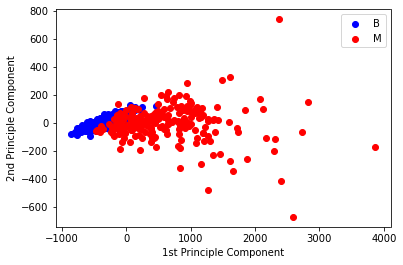

In [23]:
colors=['blue','red']
legend=['B','M']
for i in range(2):
    px=X_pca[:,0][Y==i]
    py=X_pca[:,1][Y==i]
    plt.scatter(px,py,c=colors[i],label=legend[i])
    plt.legend()
plt.xlabel('1st Principle Component')
plt.ylabel('2nd Principle Component')

In [24]:
Clust_Data=pd.DataFrame(X_pca)
Clust_Data.columns=['PC1','PC2']
Clust_Data.head()

,PC1,PC2
0,1160.142574,-293.917544
1,1269.122443,15.630182
2,995.793889,39.156743
3,-407.180803,-67.380320
4,930.341180,189.340742


In [25]:
from sklearn.cluster import KMeans
Clust_model = KMeans(2)
Clust_model.fit(Clust_Data)
y_kmeans = Clust_model.predict(Clust_Data)

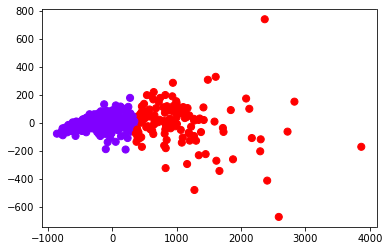

In [26]:
plt.scatter(Clust_Data['PC1'], Clust_Data['PC2'], c=y_kmeans, s=50, cmap='rainbow')

# MODEL BUILDING

In [27]:
Scale=MinMaxScaler()
X=Scale.fit_transform(X)
X.shape

(569, 30)

# Comparing Different Classification Models with Default Hyperparameter Values using cross_val_score

In [35]:
models=[LogisticRegression(), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(),
        RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(),XGBClassifier()]
def compare_models_cross_validation():
    result_cv_score=[]
    for model in models:
        cv_score=cross_val_score(model,X,Y,cv=5)
        mean_accuracy=sum(cv_score)/len(cv_score)
        result_cv_score.append({'Model':model,'Mean Accuracy':mean_accuracy})
    return result_cv_score

CV_Score=pd.DataFrame(compare_models_cross_validation(),columns=['Model','Mean Accuracy'])
CV_Score

,Model,Mean Accuracy
0,LogisticRegression(),0.963096
1,KNeighborsClassifier(),0.966620
2,GaussianNB(),0.927930
3,DecisionTreeClassifier(),0.908586
4,RandomForestClassifier(),0.957864
5,GradientBoostingClassifier(),0.961372
6,AdaBoostClassifier(),0.970113
7,"XGBClassifier(base_score=None, booster=None, c...",0.977162


In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(455, 30) (455,) (114, 30) (114,)


# Logistic Regression

In [37]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

Y_pred_test=log_reg.predict(X_test)
Y_pred_train=log_reg.predict(X_train)

print('Training Data Confusion Matrix:',confusion_matrix(Y_train,Y_pred_train))

print('Test Data Confusion Matrix:',confusion_matrix(Y_test,Y_pred_test))

Training_result=[]
Test_result=[]
Training_result.append({'Training Data Accuracy Score':accuracy_score(Y_train,Y_pred_train),
                        'Training Data Precision Score':precision_score(Y_train,Y_pred_train),
                        'Training Data Recall Score':recall_score(Y_train,Y_pred_train),
                        'Training Data f1 Score':f1_score(Y_train,Y_pred_train)})

Test_result.append({'Test Data Accuracy Score':accuracy_score(Y_test,Y_pred_test),
                    'Test Data Precision Score':precision_score(Y_test,Y_pred_test),
                    'Test Data Recall Score':recall_score(Y_test,Y_pred_test),
                    'Test Data f1 Score':f1_score(Y_test,Y_pred_test)})

Training Data Confusion Matrix: [[287   1]
 [ 12 155]]
Test Data Confusion Matrix: [[69  0]
 [ 4 41]]


# KNN Classifier

In [38]:
knn= KNeighborsClassifier()
knn_hyperparameters={'weights':['uniform', 'distance'],'n_neighbors':[5,8,10],'p':[1,2],'leaf_size':[20,30,40]}
knn_tuning=GridSearchCV(knn,knn_hyperparameters,refit=True)
knn_tuning.fit(X_train,Y_train)

Y_pred_test=knn_tuning.predict(X_test)
Y_pred_train=knn_tuning.predict(X_train)

print('Best Parameters:',knn_tuning.best_params_)
print('Best Score:',knn_tuning.best_score_)
print('\n')

print('Training Data Confusion Matrix:',confusion_matrix(Y_train,Y_pred_train))
print('Test Data Confusion Matrix:',confusion_matrix(Y_test,Y_pred_test))

Training_result.append({'Training Data Accuracy Score':accuracy_score(Y_train,Y_pred_train),
                        'Training Data Precision Score':precision_score(Y_train,Y_pred_train),
                        'Training Data Recall Score':recall_score(Y_train,Y_pred_train),
                        'Training Data f1 Score':f1_score(Y_train,Y_pred_train)})

Test_result.append({'Test Data Accuracy Score':accuracy_score(Y_test,Y_pred_test),
                    'Test Data Precision Score':precision_score(Y_test,Y_pred_test),
                    'Test Data Recall Score':recall_score(Y_test,Y_pred_test),
                    'Test Data f1 Score':f1_score(Y_test,Y_pred_test)})

Best Parameters: {'leaf_size': 20, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best Score: 0.9714285714285715


Training Data Confusion Matrix: [[287   1]
 [ 10 157]]
Test Data Confusion Matrix: [[67  2]
 [ 3 42]]


# Naive Baeyes Classifier

In [39]:
nb=GaussianNB()
nb_hyperparameters={'var_smoothing':[1e-8,1e-9,1e-10]}
nb_tuning=GridSearchCV(nb,nb_hyperparameters,refit=True)
nb_tuning.fit(X_train,Y_train)

Y_pred_test=nb_tuning.predict(X_test)
Y_pred_train=nb_tuning.predict(X_train)

print('Best Parameters:',nb_tuning.best_params_)
print('Best Score:',nb_tuning.best_score_)
print('\n')
print('Training Data Confusion Matrix:',confusion_matrix(Y_train,Y_pred_train))
print('Test Data Confusion Matrix:',confusion_matrix(Y_test,Y_pred_test))

Training_result.append({'Training Data Accuracy Score':accuracy_score(Y_train,Y_pred_train),
                        'Training Data Precision Score':precision_score(Y_train,Y_pred_train),
                        'Training Data Recall Score':recall_score(Y_train,Y_pred_train),
                        'Training Data f1 Score':f1_score(Y_train,Y_pred_train)})

Test_result.append({'Test Data Accuracy Score':accuracy_score(Y_test,Y_pred_test),
                    'Test Data Precision Score':precision_score(Y_test,Y_pred_test),
                    'Test Data Recall Score':recall_score(Y_test,Y_pred_test),
                    'Test Data f1 Score':f1_score(Y_test,Y_pred_test)})

Best Parameters: {'var_smoothing': 1e-08}
Best Score: 0.9252747252747253


Training Data Confusion Matrix: [[274  14]
 [ 18 149]]
Test Data Confusion Matrix: [[65  4]
 [ 3 42]]


# Decision Tree Classifier

In [40]:
dt=DecisionTreeClassifier()
dt_hyperparameters={'criterion':['gini', 'entropy', 'log_loss'],'splitter':['best', 'random'],'min_samples_split':[2,3,4],
                    'max_features':['auto', 'sqrt', 'log2','None'],'random_state':[6,8,10,12],'max_depth':[10,20,50,100]}
dt_tuning=GridSearchCV(dt,dt_hyperparameters,refit=True)
dt_tuning.fit(X_train,Y_train)

Y_pred_test=dt_tuning.predict(X_test)
Y_pred_train=dt_tuning.predict(X_train)

print('Best Parameters:',dt_tuning.best_params_)
print('Best Score:',dt_tuning.best_score_)
print('\n')
print('Training Data Confusion Matrix:',confusion_matrix(Y_train,Y_pred_train))
print('Test Data Confusion Matrix:',confusion_matrix(Y_test,Y_pred_test))

Training_result.append({'Training Data Accuracy Score':accuracy_score(Y_train,Y_pred_train),
                        'Training Data Precision Score':precision_score(Y_train,Y_pred_train),
                        'Training Data Recall Score':recall_score(Y_train,Y_pred_train),
                        'Training Data f1 Score':f1_score(Y_train,Y_pred_train)})

Test_result.append({'Test Data Accuracy Score':accuracy_score(Y_test,Y_pred_test),
                    'Test Data Precision Score':precision_score(Y_test,Y_pred_test),
                    'Test Data Recall Score':recall_score(Y_test,Y_pred_test),
                    'Test Data f1 Score':f1_score(Y_test,Y_pred_test)})

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 4, 'random_state': 8, 'splitter': 'random'}
Best Score: 0.956043956043956


Training Data Confusion Matrix: [[287   1]
 [  2 165]]
Test Data Confusion Matrix: [[62  7]
 [ 3 42]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2880 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 281, in fit
    raise ValueError(
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or

# Random Forest Classifier 

In [43]:
rf=RandomForestClassifier()
rf_hyperparameters={'n_estimators':[80,100,120,150],'criterion':['gini', 'entropy', 'log_loss'],
                    'min_samples_split':[2,3,4],'max_features':['auto', 'sqrt', 'log2','None'],
                    'random_state':[6,8,10,12],'max_depth':[10,20,50,100]}
rf_tuning=GridSearchCV(rf,rf_hyperparameters,refit=True)
rf_tuning.fit(X_train,Y_train)

Y_pred_test=rf_tuning.predict(X_test)
Y_pred_train=rf_tuning.predict(X_train)

print('Best Parameters:',rf_tuning.best_params_)
print('Best Score:',rf_tuning.best_score_)
print('\n')
print('Training Data Confusion Matrix:',confusion_matrix(Y_train,Y_pred_train))
print('Test Data Confusion Matrix:',confusion_matrix(Y_test,Y_pred_test))

Training_result.append({'Training Data Accuracy Score':accuracy_score(Y_train,Y_pred_train),
                        'Training Data Precision Score':precision_score(Y_train,Y_pred_train),
                        'Training Data Recall Score':recall_score(Y_train,Y_pred_train),
                        'Training Data f1 Score':f1_score(Y_train,Y_pred_train)})

Test_result.append({'Test Data Accuracy Score':accuracy_score(Y_test,Y_pred_test),
                    'Test Data Precision Score':precision_score(Y_test,Y_pred_test),
                    'Test Data Recall Score':recall_score(Y_test,Y_pred_test),
                    'Test Data f1 Score':f1_score(Y_test,Y_pred_test)})


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 80, 'random_state': 8}
Best Score: 0.964835164835165


Training Data Confusion Matrix: [[288   0]
 [  0 167]]
Test Data Confusion Matrix: [[65  4]
 [ 3 42]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5760 fits failed out of a total of 11520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2880 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\par

# Adaboost Classifier 

In [44]:
ab=AdaBoostClassifier()
ab_hyperparameters={'n_estimators':[25,50,100,200],'learning_rate':[0.5,1.0,1.5,2],'algorithm':['SAMME', 'SAMME.R']}
ab_tuning=GridSearchCV(ab,ab_hyperparameters,refit=True)
ab_tuning.fit(X_train,Y_train)

Y_pred_test=ab_tuning.predict(X_test)
Y_pred_train=ab_tuning.predict(X_train)

print('Best Parameters:',ab_tuning.best_params_)
print('Best Score:',ab_tuning.best_score_)
print('\n')
print('Training Data Confusion Matrix:',confusion_matrix(Y_train,Y_pred_train))
print('Test Data Confusion Matrix:',confusion_matrix(Y_test,Y_pred_test))

Training_result.append({'Training Data Accuracy Score':accuracy_score(Y_train,Y_pred_train),
                        'Training Data Precision Score':precision_score(Y_train,Y_pred_train),
                        'Training Data Recall Score':recall_score(Y_train,Y_pred_train),
                        'Training Data f1 Score':f1_score(Y_train,Y_pred_train)})

Test_result.append({'Test Data Accuracy Score':accuracy_score(Y_test,Y_pred_test),
                    'Test Data Precision Score':precision_score(Y_test,Y_pred_test),
                    'Test Data Recall Score':recall_score(Y_test,Y_pred_test),
                    'Test Data f1 Score':f1_score(Y_test,Y_pred_test)})

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}
Best Score: 0.9758241758241759


Training Data Confusion Matrix: [[288   0]
 [  0 167]]
Test Data Confusion Matrix: [[67  2]
 [ 3 42]]


# Gradient Boosting

In [45]:
gb=GradientBoostingClassifier()
gb_hyperparameters={'loss':['log_loss', 'deviance', 'exponential'],'learning_rate':[0.5,1.0,1.5,2],
                    'n_estimators':[25,50,100,200],'subsample':[0.6,0.8,1],'min_samples_split':[2,3,4],
                    'max_depth':[5,10,20],'max_features':['auto', 'sqrt', 'log2','None']}
gb_tuning=GridSearchCV(gb,gb_hyperparameters,refit=True)
gb_tuning.fit(X_train,Y_train)

Y_pred_test=gb_tuning.predict(X_test)
Y_pred_train=gb_tuning.predict(X_train)

print('Best Parameters:',gb_tuning.best_params_)
print('Best Score:',gb_tuning.best_score_)
print('\n')
print('Training Data Confusion Matrix:',confusion_matrix(Y_train,Y_pred_train))
print('Test Data Confusion Matrix:',confusion_matrix(Y_test,Y_pred_test))

Training_result.append({'Training Data Accuracy Score':accuracy_score(Y_train,Y_pred_train),
                        'Training Data Precision Score':precision_score(Y_train,Y_pred_train),
                        'Training Data Recall Score':recall_score(Y_train,Y_pred_train),
                        'Training Data f1 Score':f1_score(Y_train,Y_pred_train)})

Test_result.append({'Test Data Accuracy Score':accuracy_score(Y_test,Y_pred_test),
                    'Test Data Precision Score':precision_score(Y_test,Y_pred_test),
                    'Test Data Recall Score':recall_score(Y_test,Y_pred_test),
                    'Test Data f1 Score':f1_score(Y_test,Y_pred_test)})

Best Parameters: {'learning_rate': 0.5, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 0.9824175824175825


Training Data Confusion Matrix: [[288   0]
 [  0 167]]
Test Data Confusion Matrix: [[65  4]
 [ 2 43]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
12960 fits failed out of a total of 25920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8640 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'lo

# Xgboost Classifier

In [46]:
xgb= XGBClassifier()
xgb_hyperparameters={'sampling_method':['uniform','gradient_based'],'max_depth':[6,8,10],'learning_rate':[0.01,0.1,0.3]}
xgb_tuning=GridSearchCV(xgb,xgb_hyperparameters,refit=True)
xgb_tuning.fit(X_train,Y_train)

Y_pred_test=xgb_tuning.predict(X_test)
Y_pred_train=xgb_tuning.predict(X_train)

print('Best Parameters:',xgb_tuning.best_params_)
print('Best Score:',xgb_tuning.best_score_)
print('\n')
print('Training Data Confusion Matrix:',confusion_matrix(Y_train,Y_pred_train))
print('Test Data Confusion Matrix:',confusion_matrix(Y_test,Y_pred_test))

Training_result.append({'Training Data Accuracy Score':accuracy_score(Y_train,Y_pred_train),
                        'Training Data Precision Score':precision_score(Y_train,Y_pred_train),
                        'Training Data Recall Score':recall_score(Y_train,Y_pred_train),
                        'Training Data f1 Score':f1_score(Y_train,Y_pred_train)})

Test_result.append({'Test Data Accuracy Score':accuracy_score(Y_test,Y_pred_test),
                    'Test Data Precision Score':precision_score(Y_test,Y_pred_test),
                    'Test Data Recall Score':recall_score(Y_test,Y_pred_test),
                    'Test Data f1 Score':f1_score(Y_test,Y_pred_test)})

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'sampling_method': 'uniform'}
Best Score: 0.9648351648351647


Training Data Confusion Matrix: [[288   0]
 [  0 167]]
Test Data Confusion Matrix: [[64  5]
 [ 2 43]]


In [47]:
Training_result=pd.DataFrame(Training_result,columns=['Training Data Accuracy Score','Training Data Precision Score','Training Data Recall Score','Training Data f1 Score'])
Test_result=pd.DataFrame(Test_result,columns=['Test Data Accuracy Score','Test Data Precision Score','Test Data Recall Score','Test Data f1 Score'])

In [48]:
Training_result

,Training Data Accuracy Score,Training Data Precision Score,Training Data Recall Score,Training Data f1 Score
0,0.971429,0.993590,0.928144,0.959752
1,0.975824,0.993671,0.940120,0.966154
2,0.929670,0.914110,0.892216,0.903030
3,0.993407,0.993976,0.988024,0.990991
4,1.000000,1.000000,1.000000,1.000000
5,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000


In [49]:
Test_result

,Test Data Accuracy Score,Test Data Precision Score,Test Data Recall Score,Test Data f1 Score
0,0.964912,1.000000,0.911111,0.953488
1,0.956140,0.954545,0.933333,0.943820
2,0.938596,0.913043,0.933333,0.923077
3,0.912281,0.857143,0.933333,0.893617
4,0.938596,0.913043,0.933333,0.923077
5,0.938596,0.913043,0.933333,0.923077
6,0.956140,0.954545,0.933333,0.943820
7,0.947368,0.914894,0.955556,0.934783
8,0.938596,0.895833,0.955556,0.924731
